In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hed
import seaborn as sns

In [2]:
D = h5py.File('breast.h5', 'r')
X,Y,P = D['images'],np.array(D['counts']),np.array(D['id'])

In [3]:
# Split to train and test sets
split_position = np.where(P==14)[0][0]
train_x = X[0:split_position]
train_y = Y[0:split_position]
test_x = X[split_position:]
test_x = Y[split_position:]

# Question 1

## Q1 i)

In [42]:
num_train = len(train_x)
num_test = len(train_y)
print("Train:",num_train,"Test:",num_test)

Train: 5841 Test: 5841


## Q1 ii)

In [13]:
def get_image(class_val, x_data = train_x, y_data=train_y, offset = 0):
    try:
        ret = x_data[np.where(Y==class_val)[0][0 + offset]]
    except:
        ret = []
    return ret

/dcs/16/u1600920/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.
/dcs/16/u1600920/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


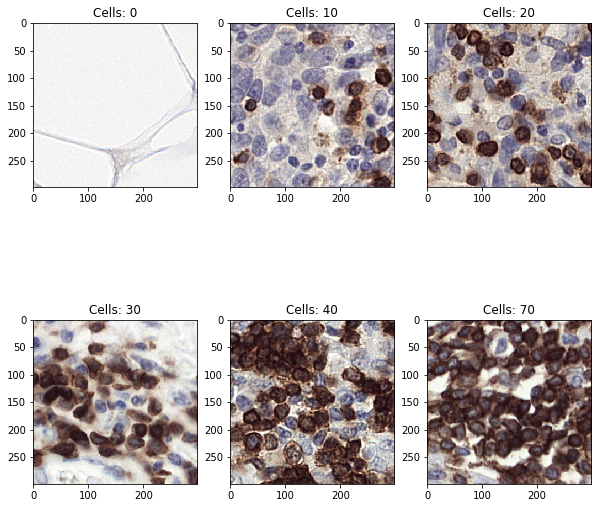

In [18]:
# Plots 6 Different images in 
m = 2
n = 3
fig, ax = plt.subplots(m,n,figsize=(10,10))

num_cells = 0
for i in range(m):
    for j in range(n):
        image = get_image(num_cells)
        while image == [] and num_cells<train_y.max():
            num_cells += 1
            image = get_image(num_cells)
        
        if image != []:
            ax[i,j].imshow(image)
            ax[i,j].title.set_text("Cells: " + str(num_cells))
        num_cells+=10
plt.show(fig)


## Q1 iii)

In [38]:
def get_num_images(range: tuple,data=train_y):
    return len(data [ np.logical_and(data>range[0],data<=range[1]) ])

total = 0
for range in [(0,0),(1,5),(6,10),(11,20),(21,50),(51,200),(201, 300)]:
    num = get_num_images(range)
    total +=num
    print("Range ", range, " had ", num, " values")
print(total)


Range  (0, 0)  had  0  values
Range  (1, 5)  had  1812  values
Range  (6, 10)  had  396  values
Range  (11, 20)  had  185  values
Range  (21, 50)  had  75  values
Range  (51, 200)  had  1  values
Range  (201, 300)  had  0  values
2469


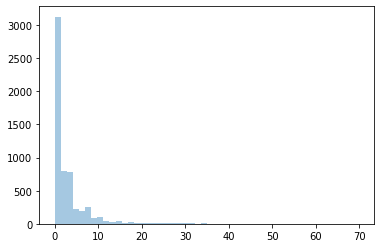

In [42]:
sns.distplot(train_y, kde=False)

In [32]:
len(Y)

7404